コードはほとんどSGDと同様の

In [1]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import svm, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Wineのデータセットを読み込む--------------------------------
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#品種(0列、1～3)と色（10列）とプロリンの量(13列)を使用する
df_wine=df_wine_all[[0,10,13]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  #この行を実行するとデータが見れる

,class,color,proline
0,1,5.640000,1065
1,1,4.380000,1050
2,1,5.680000,1185
3,1,7.800000,1480
4,1,4.320000,735
5,1,6.750000,1450
6,1,5.250000,1290
7,1,5.050000,1295
8,1,5.200000,1045
9,1,7.220000,1045


<function matplotlib.pyplot.show>

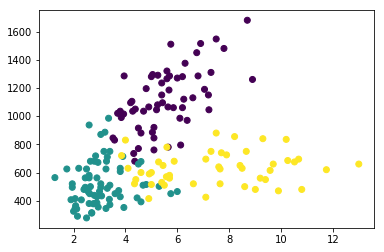

In [3]:
# プロットしてみる------------------------------------------------------
%matplotlib inline
 
x=df_wine["color"]
y=df_wine["proline"]
z=df_wine["class"]-1
plt.scatter(x,y, c=z)
plt.show

In [4]:
# データの整形-------------------------------------------------------
X=df_wine[["color","proline"]]
sc=preprocessing.StandardScaler()
sc.fit(X)
X_std=sc.transform(X)

SVCでクラスタリングする

分類ミスに対して損失の大きさにhinge関数を使用する。  
損失の大きさをどれくらい考慮するかを決めるパラメータCは1.0とし、クラスごとのデータ数の違いを補正する（weight=’balanced’）。

乱数のシードは0に固定。

In [5]:
# 機械学習で分類する---------------------------------------------------
clf_result=svm.LinearSVC(loss='hinge', C=1.0,class_weight='balanced', random_state=0, max_iter=1000) #loss='squared_hinge' #loss="hinge"
clf_result.fit(X_std, z)

LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=0, tol=0.0001, verbose=0)

In [6]:
# K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.8897316821465429
正解率の標準偏差 =  0.08067180853242613


正答率 =  0.9444444444444444


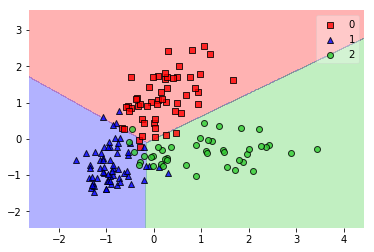

In [7]:
# トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)

#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット

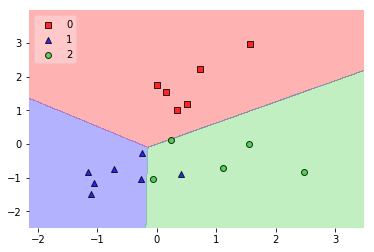

In [8]:
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

In [9]:
# 識別平面の式を手に入れる--------------------------------
print(clf_result.intercept_)
print(clf_result.coef_ )  #coef[0]*x+coef[1]*y+intercept=0

[-0.75356629 -1.42408157 -0.78174612]
[[-0.17678771  2.02133769]
 [-2.49027598 -1.14715026]
 [ 1.84955225 -1.20466709]]


#### Linear SVCとは
 - [linear SVC:sklearn](http://scikit-learn.org/stable/modules/svm.html#classification)
 - [linear SVC:sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

SVCはサポートベクトルマシンというアルゴリズム手法に基づいて、線形な識別平面を作成する。  
非線形な識別平面が欲しい場合にはカーネル関数でデータから非線形成分を作成すれば良い。

Linear SVCはカーネルは使用せずに、ただデータから線形な識別平面を作成する。

SVMを理解するには、ハードマージンSVMとソフトマージンSVMを理解する必要がある。

##### [ハードマージンSVM](http://www.sist.ac.jp/~kanakubo/research/neuro/supportvectormachine.html)
これは完全に識別平面で学習データが分類できるケースの問題であるが、殆どの問題の場合そのような完全分類できることはない。

損失関数は使用せずに識別平面を定めるため、SGDとは異なる。  
損失関数の代わりに識別平面からそれぞれのクラスの最も近い点までの距離が最大となるようなところに識別平面を引き、これをマージン最大化と呼ぶ。

この問題はすなわち  
$f(w)$→最大  
ただし、$g(w, D)$→ちゃんと識別できている  
という条件付最大化問題となる。

ここで$w$は求めたい識別平面の係数ベクトル、$f(w)$は一番近い点までの距離、$g(w,D)$は全データ$D$に対して、$w$で決まる識別平面で識別した結果を示す。

ただ、この問題は$g(w,D)$が解きにくいため、ラグランジェの未定乗数法という手法を使用して、拘束条件であった$g(w,D)$を扱いやすい形のものに置き換える工夫を行う。  
結果、[1.4.7.1. SVCの、dual以下の式](http://scikit-learn.org/stable/modules/svm.html#classification)となる。

##### ソフトマージン
完全分類できない問題では、損失関数を定義し、その損失を考慮してSVMを行う必要がある。  
それがソフトマージンSVM。

この各データの損失の大きさを求めた変数をスラック変数と呼び、損失関数をどれくらい考慮するのかを変数Cでコントロールする。  
Cが小さい損失を許し、Ｃが大きいほど損失を大きく計上する。  
つまりＣが無限のときはハードマージンSVMとなる。

損失関数はdefaultではhingeの2乗関数が使用される。

#### SGDとLinear SVCの違い
SGDは外れ値があったときに、その点が大きな誤差になり、外れ値に引っ張られやすい。  
一方でSVCはマージン最大化がメインであり識別平面近傍の点で決まるため、外れ値に影響されにくい。  
注意として、ソフトマージンの逆側に外れ値がある特殊な場合は影響はおおきい